In [1]:
from pydataset import data
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import pandas_profiling

import env
import acquire

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [3]:
df.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class            object
deck             object
embark_town      object
alone             int64
dtype: object

In [4]:
train_df, test_df = train_test_split(
    df, test_size=.30, random_state=123, stratify=df[['survived']])

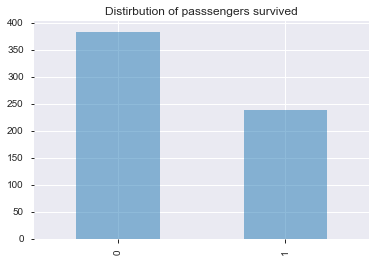

In [5]:
train_df.survived.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of passsengers survived")
plt.grid(b = True , which = "major")

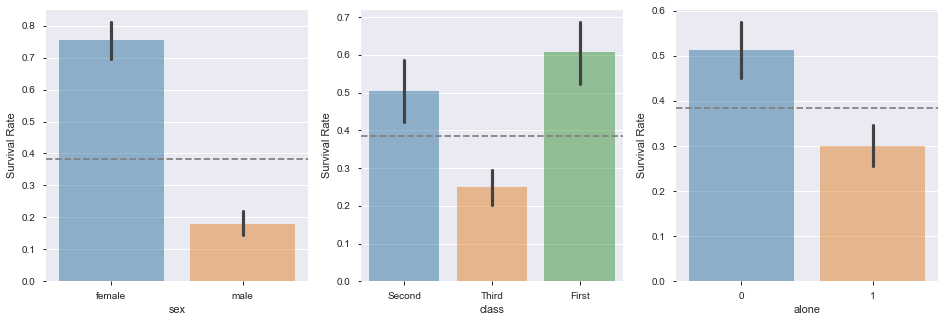

In [6]:
features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train_df.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

In [7]:
df.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class            object
deck             object
embark_town      object
alone             int64
dtype: object

In [8]:
df.dtypes[df.dtypes == 'object']

sex            object
embarked       object
class          object
deck           object
embark_town    object
dtype: object

In [9]:
# objects = df[['sex', 'embarked', 'class', 'deck', 'embark_town']]

In [10]:
objects = df.select_dtypes('object')
non_objects = df.select_dtypes(['int64', 'float64'])

In [11]:
non_objects = non_objects.drop(columns=['passenger_id'])

### Make subplots of all the object type variables

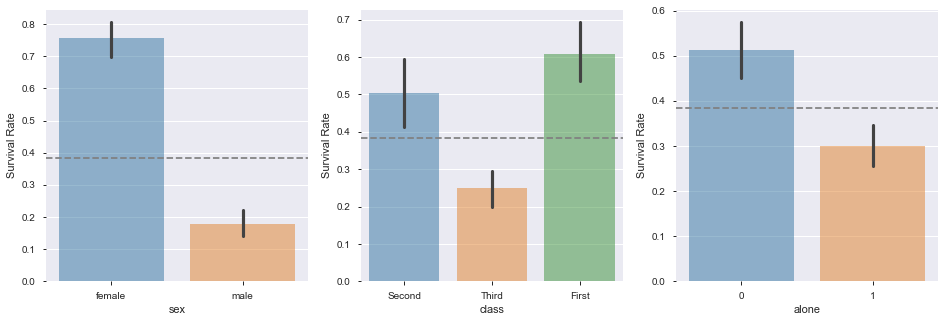

In [12]:
features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train_df.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

In [13]:
objects.head()

,sex,embarked,class,deck,embark_town
0,male,S,Third,None,Southampton
1,female,C,First,C,Cherbourg
2,female,S,Third,None,Southampton
3,female,S,First,C,Southampton
4,male,S,Third,None,Southampton


In [14]:
cols = ['sex', 'class', 'alone']
target = 'survived'
target_label = 'Survival Rate'

In [15]:
def subplot_obj_viz(cols, train_df, target, target_label):
    ncols_ct = len(cols)
    
    features = cols
    _, ax = plt.subplots(nrows=1, ncols=ncols_ct, figsize=(16,5))
    survival_rate = train_df.survived.mean()
    for i, feature in enumerate(features):
        sns.barplot(feature, target, data=train_df, ax=ax[i], alpha=.5)
        ax[i].set_ylabel(target_label)
        ax[i].axhline(survival_rate, ls='--', color='grey')
    return ax     

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ebacc88>,
      dtype=object)

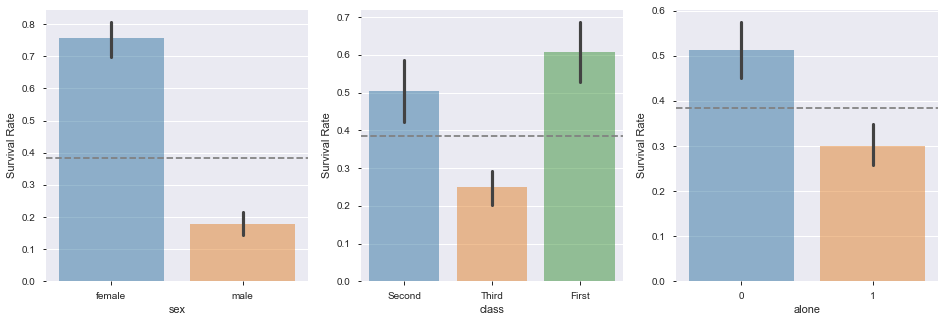

In [16]:
subplot_obj_viz(cols, train_df, target, target_label)

In [19]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [20]:
numeric = non_objects

In [21]:
def loopy_graphs(df, target):
    features = list(df.columns[(df.dtypes == object) | (df.nunique()<5)])
    
    
    pop_rate = df[target].mean()
    for i, feature in enumerate(features):
        sns.barplot(feature,target,data=df,alpha=.6)
        plt.show()

In [22]:
def plot_violin(features, target, df):
    for descrete in df[features].select_dtypes([object,int]).columns.tolist():
        if df[descrete].nunique() <= 5:
            for continous in df[features].select_dtypes(float).columns.tolist():
                sns.violinplot(descrete, continous, hue=target,
                data=df, split=True, palette=['blue','orange'])
                plt.title(continous + 'x' + descrete)
                plt.ylabel(continous)
                plt.show()

In [23]:
# SimpleImputer() # can shift tab inside of argument and it will show documentation for the function